In [81]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('Resources/Datasets/General_factor_data/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv', skiprows=4)
df

,Month,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,Apr 2022,4.213
1,Mar 2022,4.322
2,Feb 2022,3.611
3,Jan 2022,3.413
4,Dec 2021,3.406
...,...,...
344,Aug 1993,1.062
345,Jul 1993,1.078
346,Jun 1993,1.097
347,May 1993,1.100


In [65]:
df = df.rename(columns={'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon':'All_grade_price($/gallon)'})

<AxesSubplot:>

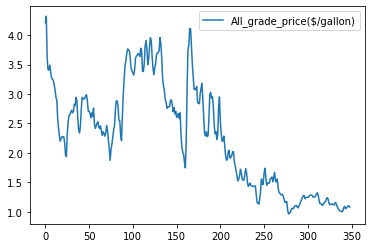

In [66]:
#plot to see data relationship
df.plot()

In [67]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['All_grade_price($/gallon)'], autolag = 'AIC')

print('ADF: ', dftest[0])
print('p-value: ', dftest[1])
print('Number of Lags: ', dftest[2])
#the data is not stationary

ADF:  -1.254113648867891
p-value:  0.6498954008436644
Number of Lags:  10


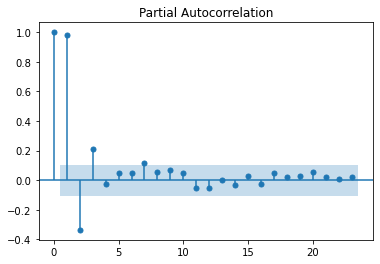

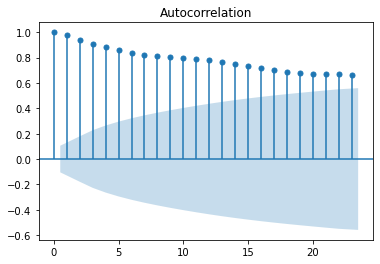

In [69]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf = plot_pacf(df['All_grade_price($/gallon)'], lags=23)
                  
acf = plot_acf(df['All_grade_price($/gallon)'], lags=23)                 

In [71]:
#create train/test datasets
X = df['All_grade_price($/gallon)']
train_data = X[:len(X)-100]
test_data = X[len(X)-100:]

In [72]:
train_data.shape

(249,)

In [73]:
test_data.shape

(100,)

In [74]:
# train autoregression
model = AutoReg(train_data, lags=25)
results = model.fit()
print(results.summary())
#print(len(train_data))

                                AutoReg Model Results                                
Dep. Variable:     All_grade_price($/gallon)   No. Observations:                  249
Model:                           AutoReg(25)   Log Likelihood                 131.987
Method:                      Conditional MLE   S.D. of innovations              0.134
Date:                       Tue, 31 May 2022   AIC                             -3.775
Time:                               03:12:52   BIC                             -3.364
Sample:                                   25   HQIC                            -3.609
                                         249                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                         0.0350      0.048      0.723      0.470      -0.060       0.130
All_grade_price($/

C:\Users\Phoeb\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [77]:
#Make a prediction
pred = results.predict(start=len(train_data), end=(len(X)-1), dynamic=False)
print(pred)

249    1.369736
250    1.365013
251    1.393252
252    1.380704
253    1.379228
         ...   
344    2.179379
345    2.183673
346    2.187705
347    2.191492
348    2.195299
Length: 100, dtype: float64


<AxesSubplot:>

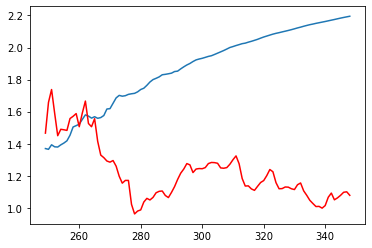

In [83]:
pred.plot()
test_data.plot(color='red')


In [88]:
import sklearn.metrics as skm
print('MAE =', round(skm.mean_absolute_error(test_data, pred), 2))
print("MSE =", round(skm.mean_squared_error(test_data, pred), 2)) 
print("MAE =", round(skm.median_absolute_error(test_data, pred), 2)) 
print("EVS =", round(skm.explained_variance_score(test_data, pred), 2)) 
print("R2 score =", round(skm.r2_score(test_data, pred), 2))

MAE = 0.68
MSE = 0.57
MAE = 0.72
EVS = -3.94
R2 score = -17.09


In [84]:
rmse = sqrt(mean_squared_error(test_data, pred))
print('rmse: ', rmse)

rmse:  0.7546404685522476


In [87]:
#make future predictions, the comming 7days
pred_future = results.predict(start=(len(X)+1), end=(len(X)+7), dynamic=False)
print('The future prediction for the next week')
print(pred_future)
print('Number of prediction make: \t', len(pred_future))

The future prediction for the next week
350    2.202157
351    2.205463
352    2.208811
353    2.212218
354    2.215508
355    2.219070
356    2.222504
dtype: float64
Number of prediction make: 	 7
